In [274]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
df = pd.read_csv('data/acoes/DISB34.SA.csv')
df = df.dropna()


df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,175.470001,175.470001,175.470001,175.470001,175.470001,0
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400


In [255]:
df.shape

(1335, 7)

In [256]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1330,2019-05-10,535.270020,535.270020,529.789978,529.789978,529.789978,900
1331,2019-05-13,529.000000,529.289978,522.190002,529.289978,529.289978,1500
1332,2019-05-14,529.750000,536.859985,529.750000,536.859985,536.859985,700
1333,2019-05-15,537.510010,537.510010,537.510010,537.510010,537.510010,300
1334,2019-05-16,543.400024,548.200012,543.400024,548.200012,548.200012,4200


In [257]:
df['last_close'] = df.apply(lambda row: df['Close'].iloc[row.name - 1], axis =1)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close
0,2014-01-02,175.470001,175.470001,175.470001,175.470001,175.470001,0,548.200012
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007


In [258]:
df['last_volume'] = df.apply(lambda row: df['Volume'].iloc[row.name - 1], axis =1)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
0,2014-01-02,175.470001,175.470001,175.470001,175.470001,175.470001,0,548.200012,4200
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200


In [259]:
df = df[1:].copy()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200
5,2014-01-09,182.649994,182.649994,181.130005,179.710007,179.710007,20500,179.710007,6400


In [260]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200
5,2014-01-09,182.649994,182.649994,181.130005,179.710007,179.710007,20500,179.710007,6400


In [261]:
df = df.set_index('Date')

In [262]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
Date,,,,,,,,
2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200
2014-01-09,182.649994,182.649994,181.130005,179.710007,179.710007,20500,179.710007,6400


In [263]:
train = df[:'2018']
test = df['2019':]

test.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
Date,,,,,,,,
2019-01-02,413.309998,413.309998,413.309998,413.309998,413.309998,1500,411.209991,500
2019-01-03,413.000000,413.000000,405.000000,405.000000,405.000000,300,413.309998,1500
2019-01-04,410.619995,410.619995,410.619995,410.619995,410.619995,600,405.000000,300
2019-01-07,415.100006,417.380005,411.910004,411.910004,411.910004,1200,410.619995,600
2019-01-08,413.869995,413.869995,413.869995,413.869995,413.869995,300,411.910004,1200


In [264]:
features = ['Open', 'last_close', 'last_volume']
target = 'Close'

In [265]:
x_train = train[features]
y_train = train[target]

In [266]:
x_test = test[features]
y_test = test[target]

In [267]:
model = Sequential()

model.add(Dense(15, activation='linear', input_dim=3))
model.add(Dense(10, activation='linear'))
model.add( Dense(1, activation='linear'))

In [268]:
np.random.seed(27)
    
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mean_absolute_error']
)

In [269]:
model.fit(x_train, y_train, epochs=50, batch_size=25)

Epoch 1/50
1242/1242 [==============================] - 0s 95us/sample - loss: 153.7780 - mean_absolute_error: 153.7780
Epoch 2/50
1242/1242 [==============================] - 0s 44us/sample - loss: 10.4006 - mean_absolute_error: 10.4006
Epoch 3/50
1242/1242 [==============================] - 0s 57us/sample - loss: 6.3860 - mean_absolute_error: 6.3860
Epoch 4/50
1242/1242 [==============================] - 0s 50us/sample - loss: 7.9712 - mean_absolute_error: 7.9712
Epoch 5/50
1242/1242 [==============================] - 0s 53us/sample - loss: 6.9289 - mean_absolute_error: 6.9289
Epoch 6/50
1242/1242 [==============================] - 0s 56us/sample - loss: 4.3789 - mean_absolute_error: 4.3789
Epoch 7/50
1242/1242 [==============================] - 0s 59us/sample - loss: 4.4926 - mean_absolute_error: 4.4926
Epoch 8/50
1242/1242 [==============================] - 0s 59us/sample - loss: 8.5247 - mean_absolute_error: 8.5247
Epoch 9/50
1242/1242 [==============================] - 0s 45us/sa

In [270]:
pred = model.predict(x_test)

In [271]:
metrics.mean_absolute_error(y_test, pred)

3.699557436417292

In [272]:
pred[:5]

array([[412.26492],
       [414.83987],
       [407.89178],
       [413.37305],
       [414.2728 ]], dtype=float32)

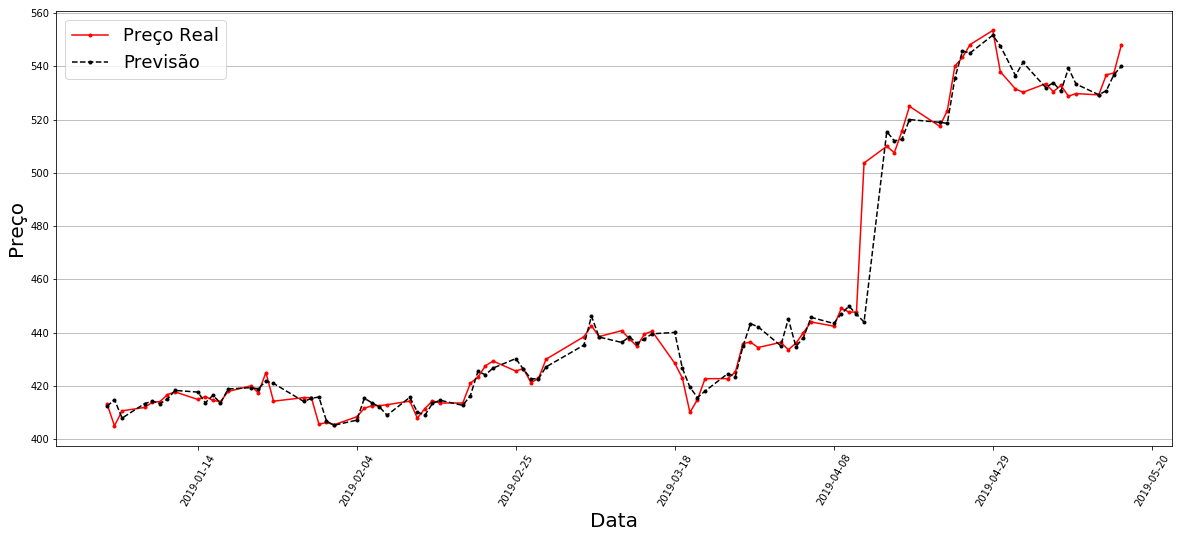

In [289]:
plt.figure(figsize=(20,8))
plt.plot(test.index, y_test, color='red', marker='.', linestyle='-', label='Preço Real')
plt.plot(test.index, pred, color='black', marker='.', linestyle='--', label='Previsão')


plt.legend(loc='upper left', prop={'size':18})
plt.xlabel('Data', fontdict={'size':20})
plt.ylabel('Preço', fontdict={'size':20})
plt.xticks(rotation='60')
plt.grid(axis='y')